In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [6]:
df=pd.read_csv('Housing.csv')

In [7]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [8]:
df.shape

(545, 13)

In [9]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


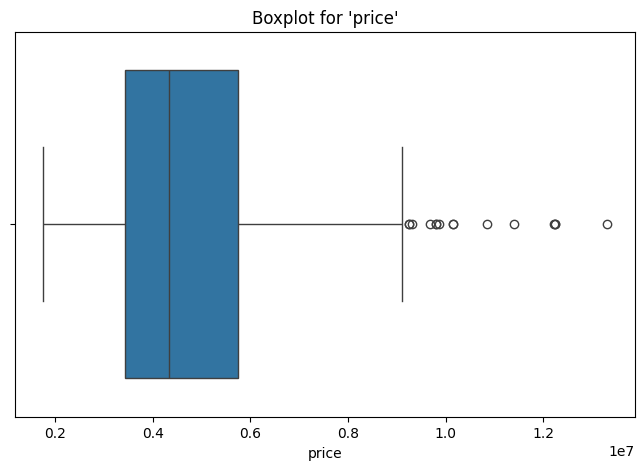

In [14]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['price'])
plt.title("Boxplot for 'price'")
plt.show()

<Figure size 1200x600 with 0 Axes>

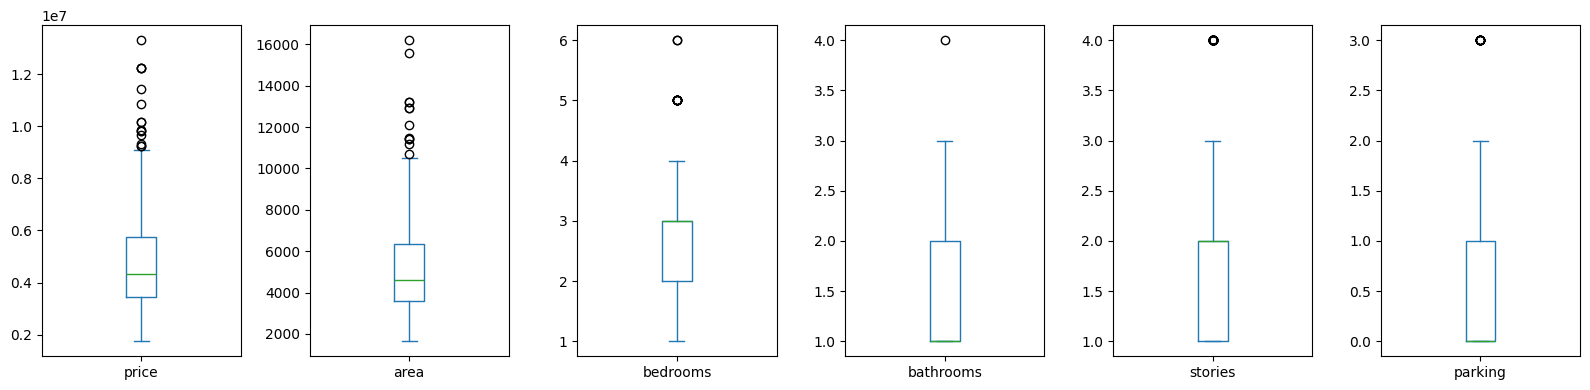

In [17]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot boxplots for all numeric columns
plt.figure(figsize=(12, 6))
df[numeric_cols].plot(kind='box', subplots=True, layout=(1, len(numeric_cols)), figsize=(16, 4), sharey=False)
plt.tight_layout()
plt.show()


In [16]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
# Make a copy of the original dataset
df_clean = df.copy()

for col in numeric_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the rows within the IQR range
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]


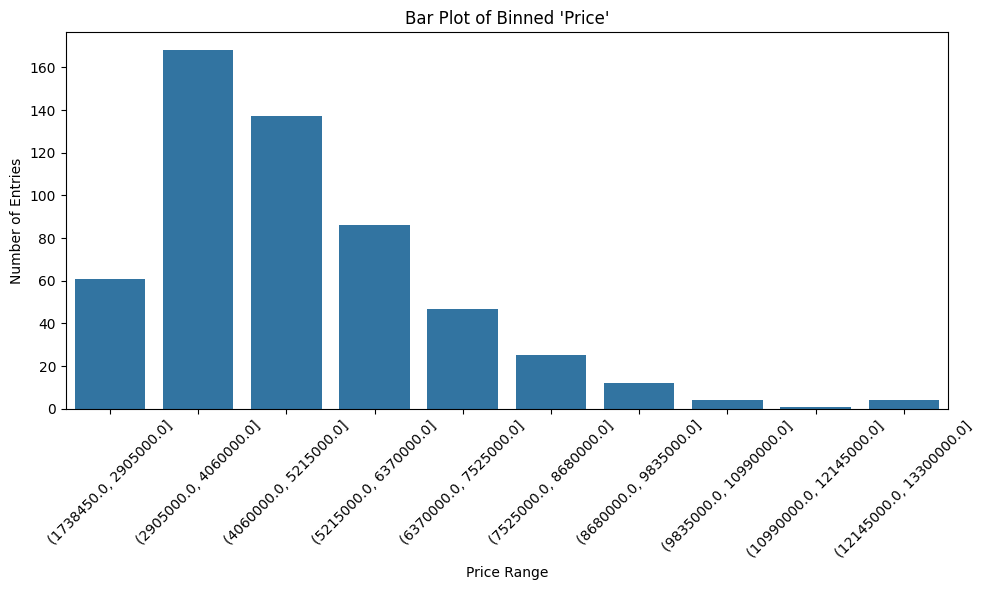

In [18]:
df['price_bin'] = pd.cut(df['price'], bins=10)  # 10 bins by default

# Count values in each bin
price_counts = df['price_bin'].value_counts().sort_index()

# Plot as bar
plt.figure(figsize=(10, 6))
sns.barplot(x=price_counts.index.astype(str), y=price_counts.values)
plt.xticks(rotation=45)
plt.xlabel("Price Range")
plt.ylabel("Number of Entries")
plt.title("Bar Plot of Binned 'Price'")
plt.tight_layout()
plt.show()

In [19]:
skew_price = df['price'].skew()
print(f"Skewness of 'price': {skew_price:.2f}")


Skewness of 'price': 1.21


In [20]:
df['price_log'] = np.log1p(df['price'])

# Re-check skewness
print("New skewness (price_log):", df['price_log'].skew())

New skewness (price_log): 0.14086281102108905


In [26]:
features = df.drop(['price', 'price_log'], axis=1)
target = df['price_log']


In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_num = scaler.fit_transform(df[num_cols])

# Convert back to DataFrame to retain column names
scaled_num_df = pd.DataFrame(scaled_num, columns=num_cols, index=df.index)


In [28]:
encoded_cat_df = pd.get_dummies(df[cat_cols], drop_first=True)


In [29]:
# Combine both
X_final = pd.concat([scaled_num_df, encoded_cat_df], axis=1)

# Set the target
y = df['price_log']


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=42
)


In [31]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [34]:
# Predict on test data
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R^2 Score:", r2)


Mean Absolute Error (MAE): 0.1999026782847302
Mean Squared Error (MSE): 0.06329354097113268
R^2 Score: 0.6722047416501384


In [36]:
# 1. Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# 2. Compute correlation of all features with the target
correlation_with_target = numeric_df.corr()['price_log'].drop('price_log')

# 3. Sort by absolute correlation
important_features = correlation_with_target.abs().sort_values(ascending=False)

# 4. Show result
print("Most important numeric features (correlation with price_log):")
print(important_features)


Most important numeric features (correlation with price_log):
price        0.969010
area         0.543233
bathrooms    0.485715
stories      0.415281
parking      0.371638
bedrooms     0.369986
Name: price_log, dtype: float64


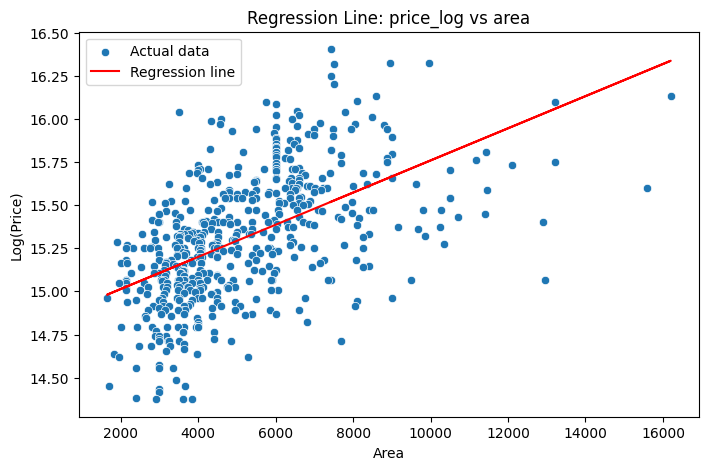

In [37]:
X = df[['area']]             # area as input feature
y = df['price_log']          # log-transformed target

# Train the model
model = LinearRegression()
model.fit(X, y)

# Predict to get regression line
y_pred = model.predict(X)

# Plot scatter and regression line
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X['area'], y=y, label='Actual data')
plt.plot(X['area'], y_pred, color='red', label='Regression line')
plt.title('Regression Line: price_log vs area')
plt.xlabel('Area')
plt.ylabel('Log(Price)')
plt.legend()
plt.show()


In [38]:
# Show coefficients
print(f"Intercept (β₀): {model.intercept_:.4f}")
print(f"Coefficient (β₁ for area): {model.coef_[0]:.4f}")


Intercept (β₀): 14.8272
Coefficient (β₁ for area): 0.0001


ValueError: could not convert string to float: 'yes'